# K-nearest neighbor algorithm

In [1588]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
plt.style.use('ggplot')



### Importing the dataset

In [1589]:
dataset = pd.read_csv('./Adult_Census_Income_Binary_Classification_dataset.csv');

dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [1590]:
dataset.shape

(32561, 14)

### Replace missing values(?) with NaN

In [1591]:
#replace missing data values
data_missing_columns = [' workclass', ' occupation', ' native-country']

for column in data_missing_columns:
    dataset[column] = dataset[column].replace('[?]', np.NaN, regex = True)

### Mean value is used for missing data in capital-gain and capital-loss columns 

In [1592]:
dataset = dataset.dropna()

labelEncoder_values = LabelEncoder()

for col in [1,2,4,5,6,7,8,12,13]:
    dataset.iloc[:,col] = labelEncoder_values.fit_transform((dataset.iloc[:,col]))  
    
min_max = MinMaxScaler()
dataset.iloc[:,0:13 ]= min_max.fit_transform(dataset.iloc[:,0:13] )
dataset.head() 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.95,0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.95,0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.95,0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.95,0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.10,0


### Converting categorical data into numerical values

In [1593]:
labelEncoder_values = LabelEncoder()

for col in [1,2,4,5,6,7,8,12,13]:
    dataset.iloc[:,col] = labelEncoder_values.fit_transform(dataset.iloc[:,col])

dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,5,9,0.800000,4,0,1,4,1,0.02174,0.0,0.397959,38,0
1,0.452055,4,9,0.800000,2,3,0,4,1,0.00000,0.0,0.122449,38,0
2,0.287671,2,11,0.533333,0,5,1,4,1,0.00000,0.0,0.397959,38,0
3,0.493151,2,1,0.400000,2,5,0,2,1,0.00000,0.0,0.397959,38,0
4,0.150685,2,9,0.800000,2,9,5,2,0,0.00000,0.0,0.397959,4,0


### Splitting the dataset for training and testing

In [1594]:
#split dataset
X = dataset.iloc[:, 0:13]
Y = dataset.iloc[:, 13]
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=11, test_size=0.3)


### Finding the best K value for the model

In [1595]:
#finding the best k value for the model
neighbors = np.arange(3, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    classifier = KNeighborsClassifier(n_neighbors = k, p = 2)
    
    classifier.fit(x_train, y_train)
    
    train_accuracy[i] = classifier.score(x_train, y_train)
    test_accuracy[i] = classifier.score(x_test, y_test)

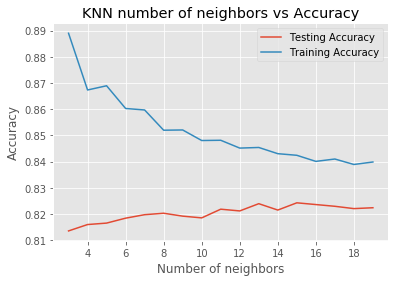

In [1596]:
#generate plot
%matplotlib inline
plt.title('KNN number of neighbors vs Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()



#### 15 is chosen as the K value since it shows the highest testing accuracy and also to make sure we choose a value high enough to avoid over fitting

In [1597]:
#K is chosen as 15 since the highest testing accuracy is at 15
classifier = KNeighborsClassifier(n_neighbors = 15, p = 2)

In [1598]:
#fitting the model
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

### Testing and evaluating the model

In [1599]:
#testing with the test data set
y_pred = classifier.predict(x_test)

In [1600]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix\n')
print(cm)
print('\n')

#confusion matrix
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix

[[6218  557]
 [1045 1229]]


Predicted     0     1   All
True                       
0          6218   557  6775
1          1045  1229  2274
All        7263  1786  9049


In [1601]:
#full classification report
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
             precision    recall  f1-score   support

          0       0.86      0.92      0.89      6775
          1       0.69      0.54      0.61      2274

avg / total       0.81      0.82      0.82      9049



In [1602]:
#accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of the model: ' + str(accuracy))

Accuracy of the model: 0.8229638634103216


# Logistic regression

In [1603]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

dataset = pd.read_csv('./Adult_Census_Income_Binary_Classification_dataset.csv');


### Handling missing data

In [1604]:
data_missing_columns = [' workclass', ' occupation', ' native-country']

for column in data_missing_columns:
    dataset[column] = dataset[column].replace('[?]', np.NaN, regex = True)

    
dataset = dataset.dropna()

### Converting categorical data into numerical values

In [1605]:
labelEncoder_values = LabelEncoder()

for col in [1,2,4,5,6,7,8,12,13]:
    dataset.iloc[:,col] = labelEncoder_values.fit_transform((dataset.iloc[:,col]))    


### Scaling data

In [1606]:
min_max = MinMaxScaler()
dataset.iloc[:,0:13 ]= min_max.fit_transform(dataset.iloc[:,0:13] )
dataset.head() 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.95,0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.95,0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.95,0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.95,0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.10,0


### Splitting data set as training, testing and validation

In [1607]:
#split dataset
X = dataset.iloc[:, 0:13]
Y = dataset.iloc[:, 13]

#Y_one_hot = np_utils.to_categorical(Y, 2) 

#splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=4, test_size=0.3)

#splitting testing and validation data set
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, random_state=4, test_size=0.5)


### Creating and fitting the model 

In [1608]:
model = Sequential()
model.add(Dense(1, activation='sigmoid',kernel_initializer='normal', input_dim=13))
model.compile(optimizer= SGD(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [1609]:
#fitting the model
BATCH_SIZE = 80
EPOCHES = 500
VERBOSE = 1

#early stopping is used to avoid over fiiting
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None)
model_history = model.fit(x=x_train, y=y_train, batch_size=BATCH_SIZE, 
                          epochs=EPOCHES, verbose=VERBOSE, validation_data=(x_val, y_val), callbacks = [early_stopping])


Train on 21113 samples, validate on 4525 samples
Epoch 1/500
21113/21113 [==============================] - 3s 129us/step - loss: 0.5860 - acc: 0.7503 - val_loss: 0.5667 - val_acc: 0.7470
Epoch 2/500
21113/21113 [==============================] - 1s 34us/step - loss: 0.5567 - acc: 0.7512 - val_loss: 0.5571 - val_acc: 0.7470
Epoch 3/500
21113/21113 [==============================] - 1s 37us/step - loss: 0.5477 - acc: 0.7512 - val_loss: 0.5491 - val_acc: 0.7470
Epoch 4/500
21113/21113 [==============================] - 1s 44us/step - loss: 0.5401 - acc: 0.7512 - val_loss: 0.5424 - val_acc: 0.7470
Epoch 5/500
21113/21113 [==============================] - 1s 40us/step - loss: 0.5336 - acc: 0.7512 - val_loss: 0.5367 - val_acc: 0.7470
Epoch 6/500
21113/21113 [==============================] - 1s 42us/step - loss: 0.5280 - acc: 0.7512 - val_loss: 0.5318 - val_acc: 0.7470
Epoch 7/500
21113/21113 [==============================] - 1s 38us/step - loss: 0.5232 - acc: 0.7512 - val_loss: 0.5275 - 

21113/21113 [==============================] - 1s 28us/step - loss: 0.4545 - acc: 0.7844 - val_loss: 0.4665 - val_acc: 0.7775
Epoch 60/500
21113/21113 [==============================] - 1s 29us/step - loss: 0.4540 - acc: 0.7858 - val_loss: 0.4661 - val_acc: 0.7770
Epoch 61/500
21113/21113 [==============================] - 1s 30us/step - loss: 0.4535 - acc: 0.7861 - val_loss: 0.4656 - val_acc: 0.7772
Epoch 62/500
21113/21113 [==============================] - 1s 30us/step - loss: 0.4530 - acc: 0.7868 - val_loss: 0.4653 - val_acc: 0.7775
Epoch 63/500
21113/21113 [==============================] - 1s 29us/step - loss: 0.4526 - acc: 0.7882 - val_loss: 0.4649 - val_acc: 0.7775
Epoch 64/500
21113/21113 [==============================] - 1s 29us/step - loss: 0.4521 - acc: 0.7876 - val_loss: 0.4644 - val_acc: 0.7781
Epoch 65/500
21113/21113 [==============================] - 1s 33us/step - loss: 0.4517 - acc: 0.7887 - val_loss: 0.4640 - val_acc: 0.7794
Epoch 66/500
21113/21113 [==============

Epoch 118/500
21113/21113 [==============================] - 1s 35us/step - loss: 0.4359 - acc: 0.7987 - val_loss: 0.4503 - val_acc: 0.7881
Epoch 119/500
21113/21113 [==============================] - 1s 29us/step - loss: 0.4357 - acc: 0.7988 - val_loss: 0.4501 - val_acc: 0.7885
Epoch 120/500
21113/21113 [==============================] - 1s 28us/step - loss: 0.4355 - acc: 0.7991 - val_loss: 0.4500 - val_acc: 0.7874
Epoch 121/500
21113/21113 [==============================] - 1s 28us/step - loss: 0.4352 - acc: 0.7990 - val_loss: 0.4498 - val_acc: 0.7885
Epoch 122/500
21113/21113 [==============================] - 1s 28us/step - loss: 0.4351 - acc: 0.8000 - val_loss: 0.4497 - val_acc: 0.7876
Epoch 123/500
21113/21113 [==============================] - 1s 28us/step - loss: 0.4349 - acc: 0.7997 - val_loss: 0.4495 - val_acc: 0.7883
Epoch 124/500
21113/21113 [==============================] - 1s 29us/step - loss: 0.4347 - acc: 0.8000 - val_loss: 0.4494 - val_acc: 0.7876
Epoch 125/500
21113/

21113/21113 [==============================] - 1s 66us/step - loss: 0.4271 - acc: 0.8047 - val_loss: 0.4428 - val_acc: 0.7923
Epoch 177/500
21113/21113 [==============================] - 1s 70us/step - loss: 0.4270 - acc: 0.8044 - val_loss: 0.4427 - val_acc: 0.7929
Epoch 178/500
21113/21113 [==============================] - 1s 56us/step - loss: 0.4268 - acc: 0.8049 - val_loss: 0.4427 - val_acc: 0.7903
Epoch 179/500
21113/21113 [==============================] - 1s 51us/step - loss: 0.4267 - acc: 0.8041 - val_loss: 0.4424 - val_acc: 0.7925
Epoch 180/500
21113/21113 [==============================] - 1s 53us/step - loss: 0.4266 - acc: 0.8049 - val_loss: 0.4423 - val_acc: 0.7927
Epoch 181/500
21113/21113 [==============================] - 1s 52us/step - loss: 0.4265 - acc: 0.8046 - val_loss: 0.4423 - val_acc: 0.7927
Epoch 182/500
21113/21113 [==============================] - 1s 34us/step - loss: 0.4264 - acc: 0.8049 - val_loss: 0.4423 - val_acc: 0.7920
Epoch 183/500
21113/21113 [=======

21113/21113 [==============================] - 1s 30us/step - loss: 0.4218 - acc: 0.8075 - val_loss: 0.4381 - val_acc: 0.7940
Epoch 235/500
21113/21113 [==============================] - 1s 29us/step - loss: 0.4217 - acc: 0.8071 - val_loss: 0.4381 - val_acc: 0.7936
Epoch 236/500
21113/21113 [==============================] - 1s 28us/step - loss: 0.4216 - acc: 0.8072 - val_loss: 0.4380 - val_acc: 0.7940
Epoch 237/500
21113/21113 [==============================] - 1s 28us/step - loss: 0.4215 - acc: 0.8067 - val_loss: 0.4378 - val_acc: 0.7945
Epoch 238/500
21113/21113 [==============================] - 1s 28us/step - loss: 0.4215 - acc: 0.8070 - val_loss: 0.4377 - val_acc: 0.7945
Epoch 239/500
21113/21113 [==============================] - 1s 29us/step - loss: 0.4214 - acc: 0.8076 - val_loss: 0.4378 - val_acc: 0.7940
Epoch 240/500
21113/21113 [==============================] - 1s 28us/step - loss: 0.4213 - acc: 0.8075 - val_loss: 0.4377 - val_acc: 0.7947
Epoch 241/500
21113/21113 [=======

21113/21113 [==============================] - 1s 34us/step - loss: 0.4181 - acc: 0.8089 - val_loss: 0.4347 - val_acc: 0.7965
Epoch 293/500
21113/21113 [==============================] - 1s 33us/step - loss: 0.4180 - acc: 0.8092 - val_loss: 0.4349 - val_acc: 0.7962
Epoch 294/500
21113/21113 [==============================] - 1s 32us/step - loss: 0.4180 - acc: 0.8078 - val_loss: 0.4346 - val_acc: 0.7967
Epoch 295/500
21113/21113 [==============================] - 1s 32us/step - loss: 0.4180 - acc: 0.8088 - val_loss: 0.4345 - val_acc: 0.7971
Epoch 296/500
21113/21113 [==============================] - 1s 32us/step - loss: 0.4179 - acc: 0.8090 - val_loss: 0.4346 - val_acc: 0.7960
Epoch 297/500
21113/21113 [==============================] - 1s 28us/step - loss: 0.4179 - acc: 0.8086 - val_loss: 0.4345 - val_acc: 0.7973
Epoch 298/500
21113/21113 [==============================] - 1s 29us/step - loss: 0.4178 - acc: 0.8093 - val_loss: 0.4345 - val_acc: 0.7965
Epoch 299/500
21113/21113 [=======

21113/21113 [==============================] - 1s 49us/step - loss: 0.4155 - acc: 0.8096 - val_loss: 0.4322 - val_acc: 0.7978
Epoch 351/500
21113/21113 [==============================] - 1s 49us/step - loss: 0.4154 - acc: 0.8099 - val_loss: 0.4322 - val_acc: 0.7973
Epoch 352/500
21113/21113 [==============================] - 1s 33us/step - loss: 0.4154 - acc: 0.8088 - val_loss: 0.4322 - val_acc: 0.7971
Epoch 353/500
21113/21113 [==============================] - 1s 33us/step - loss: 0.4154 - acc: 0.8093 - val_loss: 0.4321 - val_acc: 0.7973
Epoch 354/500
21113/21113 [==============================] - 1s 33us/step - loss: 0.4153 - acc: 0.8099 - val_loss: 0.4322 - val_acc: 0.7969
Epoch 355/500
21113/21113 [==============================] - 1s 33us/step - loss: 0.4153 - acc: 0.8094 - val_loss: 0.4322 - val_acc: 0.7969
Epoch 356/500
21113/21113 [==============================] - 1s 34us/step - loss: 0.4152 - acc: 0.8092 - val_loss: 0.4320 - val_acc: 0.7976
Epoch 357/500
21113/21113 [=======

21113/21113 [==============================] - 1s 33us/step - loss: 0.4134 - acc: 0.8106 - val_loss: 0.4302 - val_acc: 0.7978
Epoch 409/500
21113/21113 [==============================] - 1s 33us/step - loss: 0.4134 - acc: 0.8099 - val_loss: 0.4303 - val_acc: 0.7971
Epoch 410/500
21113/21113 [==============================] - 1s 36us/step - loss: 0.4134 - acc: 0.8101 - val_loss: 0.4301 - val_acc: 0.7978
Epoch 411/500
21113/21113 [==============================] - 1s 32us/step - loss: 0.4133 - acc: 0.8106 - val_loss: 0.4302 - val_acc: 0.7976
Epoch 412/500
21113/21113 [==============================] - 1s 33us/step - loss: 0.4133 - acc: 0.8098 - val_loss: 0.4301 - val_acc: 0.7976
Epoch 413/500
21113/21113 [==============================] - 1s 31us/step - loss: 0.4133 - acc: 0.8104 - val_loss: 0.4300 - val_acc: 0.7980
Epoch 414/500
21113/21113 [==============================] - 1s 29us/step - loss: 0.4132 - acc: 0.8102 - val_loss: 0.4300 - val_acc: 0.7980
Epoch 415/500
21113/21113 [=======

### Testing and evaluating the model 

In [1610]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


4524/4524 [==============================] - 0s 48us/step
Test score: 0.41539833273748505
Test accuracy: 0.8123342174539304


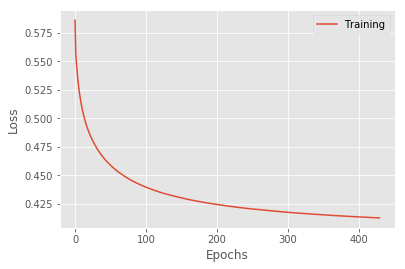

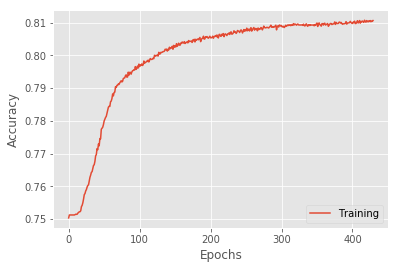

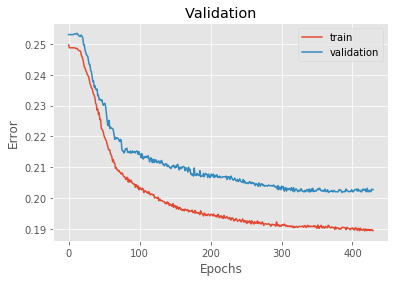

In [1611]:
# import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.legend(['Training'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.legend(['Training'], loc='lower right')
    plt.show()
        
    plt.plot(1-np.array(model_history.history['acc']), label="train")
    plt.plot(1-np.array(model_history.history['val_acc']), label="validation")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title("Validation")
    plt.legend()
    plt.show()

plot_history(model_history)

In [1612]:
#testing with the test data set
y_pred = model.predict_classes(x_test).flatten()
print(y_pred)

[1 0 0 ... 0 0 0]


In [1613]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix\n')
print(cm)
print('\n')

#confusion matrix
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix

[[3228  185]
 [ 664  447]]


Predicted     0    1   All
True                      
0          3228  185  3413
1           664  447  1111
All        3892  632  4524


In [1614]:
#full classification report
print('Classification Report')
print(classification_report(y_test, y_pred))


Classification Report
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      3413
          1       0.71      0.40      0.51      1111

avg / total       0.80      0.81      0.79      4524



In [1615]:
#accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of the model: ' + str(accuracy))

Accuracy of the model: 0.8123342175066313


# Neural network

In [1652]:
from keras.utils import np_utils

### Building the model

In [1653]:
model = Sequential([
    Dense(13, input_dim=13, activation='relu'),
    Dense(13, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer= SGD(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_179 (Dense)            (None, 13)                182       
_________________________________________________________________
dense_180 (Dense)            (None, 13)                182       
_________________________________________________________________
dense_181 (Dense)            (None, 1)                 14        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


### Fitting the model 

In [1654]:
#fitting the model
BATCH_SIZE = 80
EPOCHES = 500
VERBOSE = 1

#early stopping is used to avoid over fiiting
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None)
model_history = model.fit(x=x_train, y=y_train, batch_size=BATCH_SIZE, 
                          epochs=EPOCHES, verbose=VERBOSE, validation_data=(x_val, y_val), callbacks = [early_stopping])


Train on 21113 samples, validate on 4525 samples
Epoch 1/500
21113/21113 [==============================] - 3s 133us/step - loss: 0.5839 - acc: 0.7421 - val_loss: 0.5578 - val_acc: 0.7487
Epoch 2/500
21113/21113 [==============================] - 1s 33us/step - loss: 0.5392 - acc: 0.7549 - val_loss: 0.5323 - val_acc: 0.7518
Epoch 3/500
21113/21113 [==============================] - 1s 32us/step - loss: 0.5167 - acc: 0.7565 - val_loss: 0.5124 - val_acc: 0.7525
Epoch 4/500
21113/21113 [==============================] - 1s 31us/step - loss: 0.4948 - acc: 0.7590 - val_loss: 0.4921 - val_acc: 0.7578
Epoch 5/500
21113/21113 [==============================] - 1s 32us/step - loss: 0.4776 - acc: 0.7667 - val_loss: 0.4796 - val_acc: 0.7649
Epoch 6/500
21113/21113 [==============================] - 1s 32us/step - loss: 0.4656 - acc: 0.7738 - val_loss: 0.4698 - val_acc: 0.7741
Epoch 7/500
21113/21113 [==============================] - 1s 33us/step - loss: 0.4557 - acc: 0.7822 - val_loss: 0.4619 - 

21113/21113 [==============================] - 1s 33us/step - loss: 0.3501 - acc: 0.8354 - val_loss: 0.3627 - val_acc: 0.8270
Epoch 60/500
21113/21113 [==============================] - 1s 31us/step - loss: 0.3498 - acc: 0.8345 - val_loss: 0.3661 - val_acc: 0.8241
Epoch 61/500
21113/21113 [==============================] - 1s 31us/step - loss: 0.3481 - acc: 0.8373 - val_loss: 0.3645 - val_acc: 0.8254
Epoch 62/500
21113/21113 [==============================] - 1s 32us/step - loss: 0.3487 - acc: 0.8356 - val_loss: 0.3632 - val_acc: 0.8278


### Testing and evaluating the model

In [1655]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


4524/4524 [==============================] - 0s 49us/step
Test score: 0.3488655054100207
Test accuracy: 0.8359858532272325


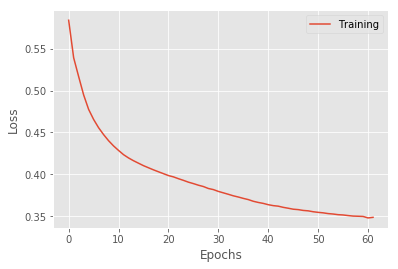

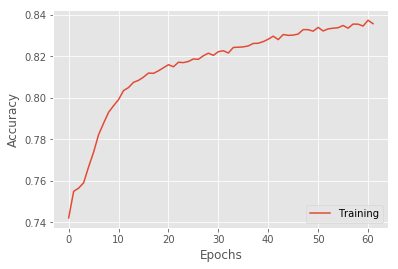

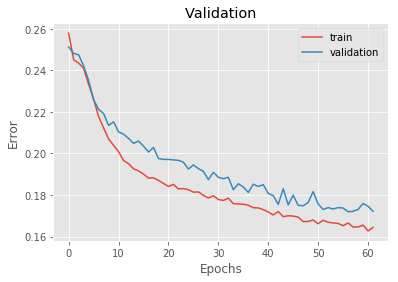

In [1656]:
# import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.legend(['Training'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.legend(['Training'], loc='lower right')
    plt.show()
        
    plt.plot(1-np.array(model_history.history['acc']), label="train")
    plt.plot(1-np.array(model_history.history['val_acc']), label="validation")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title("Validation")
    plt.legend()
    plt.show()

plot_history(model_history)

In [1657]:
#testing with the test data set
y_pred = model.predict_classes(x_test).flatten()
print(y_pred)

[1 0 0 ... 0 0 0]


In [1658]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix\n')
print(cm)
print('\n')

#confusion matrix
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix

[[3220  193]
 [ 549  562]]


Predicted     0    1   All
True                      
0          3220  193  3413
1           549  562  1111
All        3769  755  4524


In [1659]:
#full classification report
print('Classification Report')
print(classification_report(y_test, y_pred))


Classification Report
             precision    recall  f1-score   support

          0       0.85      0.94      0.90      3413
          1       0.74      0.51      0.60      1111

avg / total       0.83      0.84      0.82      4524



In [1660]:
#accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of the model: ' + str(accuracy))

Accuracy of the model: 0.8359858532272325


## Comparing the models

Accuracy of KNN model = 82% 

Accuracy of logistric regression model = 81% 

Accuracy of neural network = 83%

Therefore neural network gives a better accuracy with the adult census income dataset